In [1]:
# Recommendation System

In [2]:
# Tasks:
# Data Preprocessing:
# Load the dataset into a suitable data structure (e.g., pandas DataFrame).
# Handle missing values, if any.
# Explore the dataset to understand its structure and attributes.

In [1]:
# Data Preprocessing:
# Load the dataset into a suitable data structure (e.g., pandas DataFrame).
import pandas as pd
df= pd.read_csv("anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [3]:
# Handle missing values, if any.
df.isnull().sum() # THere are null values in the given data set.genre=62,type=25,rating=230

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [4]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [5]:
df.describe(include=object)

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Saru Kani Gassen,Hentai,TV,1
freq,2,823,3787,5677


In [6]:
import numpy as np
median= np.round(df['rating'].median(),2)

In [7]:
df['rating'].fillna(value= median,inplace=True)

C:\Users\andeb\AppData\Local\Temp\ipykernel_17784\1059466411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(value= median,inplace=True)


In [8]:
df.isnull().sum() # In rating column, the null values are replaced with their median value.

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [9]:
# The column type and genre should be filled with unknown.
df['type'] = df['type'].fillna('unknown')
df['genre']= df['genre'].fillna('unknown')

In [10]:
df.isnull().sum() # All the null values or missing values in the data set are replaced accordingly.

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
df['genre'].value_counts()

genre
Hentai                                                                            823
Comedy                                                                            523
Music                                                                             301
Kids                                                                              199
Comedy, Slice of Life                                                             179
                                                                                 ... 
Action, Adventure, Comedy, Fantasy, Martial Arts, Sci-Fi, Shounen, Super Power      1
Drama, Fantasy, Historical, Magic, Romance, Shoujo, Supernatural                    1
Action, Mecha, Military, School, Sci-Fi, Super Power                                1
Ecchi, Romance, School, Seinen                                                      1
Action, Adventure, Drama, Fantasy, Magic, Military, Shounen                         1
Name: count, Length: 3265, dtype: int64

In [12]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
unknown      25
Name: count, dtype: int64

In [13]:
df['episodes'].value_counts()

episodes
1       5677
2       1076
12       816
13       572
26       514
        ... 
1006       1
162        1
132        1
141        1
125        1
Name: count, Length: 187, dtype: int64

In [14]:
df['rating'].value_counts()

rating
6.57    283
6.00    141
7.00     99
6.50     90
6.25     84
       ... 
2.98      1
3.44      1
1.92      1
2.86      1
3.14      1
Name: count, Length: 598, dtype: int64

In [15]:
df['members'].value_counts()

members
60        36
72        36
74        33
62        32
103       31
          ..
1310       1
1922       1
75894      1
416397     1
27411      1
Name: count, Length: 6706, dtype: int64

In [16]:
# Explore the dataset to understand its structure and attributes.

In [17]:
df.duplicated().sum() # there are no duplicated rows.genres = df['genre'].str.split(', ').explode()

np.int64(0)

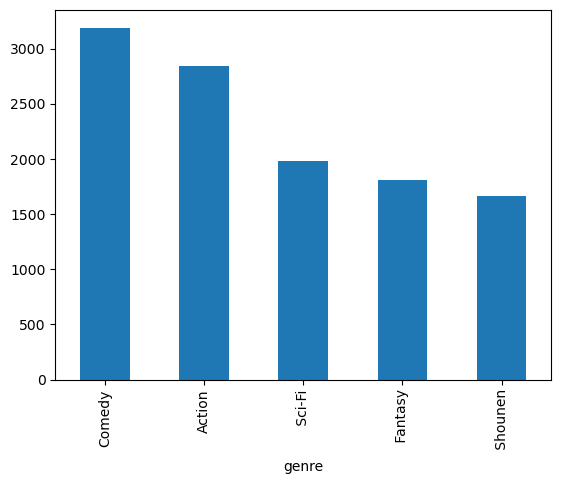

In [18]:
import matplotlib.pyplot as plt
genre = df['genre'].str.split(',').explode()
genre.value_counts().head().plot(kind='bar')
plt.show()

<Axes: xlabel='type'>

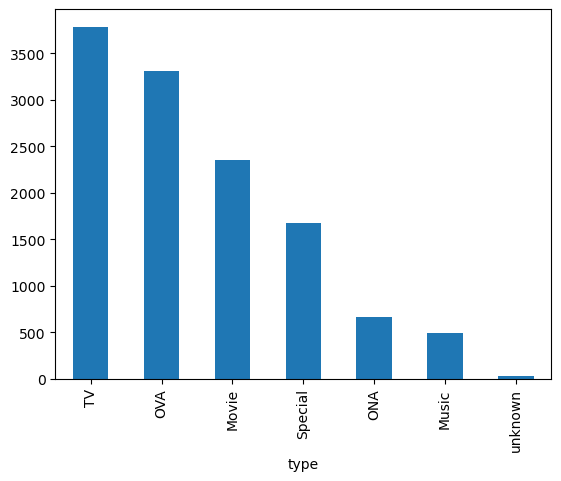

In [19]:
type = df['type'].str.split(',').explode()
type.value_counts().plot(kind='bar')

<Axes: xlabel='episodes'>

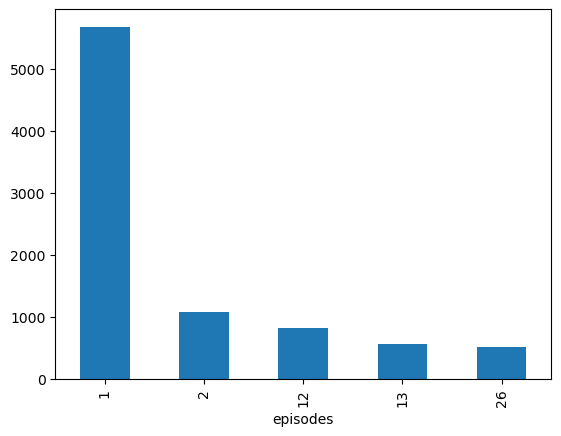

In [20]:
episodes = df['episodes'].str.split().explode()
episodes.value_counts().head().plot(kind='bar')

In [21]:
# Feature Extraction:
# Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
# Convert categorical features into numerical representations if necessary.
# Normalize numerical features if required.

In [22]:
# Feature Extraction:
# Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
# Genre:
# Represents the content and theme of the anime
# Anime with similar genres are more likely to be similar
# Most important for content-based similarity
# Rating:
# Represents overall audience preference
# Helps differentiate quality among similar genres
# Type 
# TV, Movie, OVA, etc.
# Helps avoid comparing very different formats

In [31]:
# Convert categorical features into numerical representations if necessary.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le_type = LabelEncoder()
df['type_encoded'] = le_type.fit_transform(df['type'])

le_genre= LabelEncoder()
df['genre_encoded']=le_genre.fit_transform(df['genre'])

df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['episodes'].fillna(df['episodes'].median(), inplace=True)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].fillna(df['rating'].median(), inplace=True)

df['members'] = pd.to_numeric(df['members'], errors='coerce')
df['members'].fillna(df['members'].median(), inplace=True)

df['members_log'] = np.log1p(df['members']) # reduce skew

C:\Users\andeb\AppData\Local\Temp\ipykernel_17784\2055869208.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episodes'].fillna(df['episodes'].median(), inplace=True)
C:\Users\andeb\AppData\Local\Temp\ipykernel_17784\2055869208.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [33]:
# Normalize numerical features if required.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['episodes','rating','members_log']] = scaler.fit_transform(df[['episodes','rating','members_log']])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12294 non-null  int64  
 1   name           12294 non-null  object 
 2   genre          12294 non-null  object 
 3   type           12294 non-null  object 
 4   episodes       12294 non-null  float64
 5   rating         12294 non-null  float64
 6   members        12294 non-null  int64  
 7   type_encoded   12294 non-null  int64  
 8   genre_encoded  12294 non-null  int64  
 9   members_log    12294 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 960.6+ KB


In [48]:
df_cat=pd.concat([df['type_encoded'],df['genre_encoded']],axis=1)
df_num= pd.concat([df['episodes'],df['rating'],df['members_log']],axis=1)
df_index= pd.concat([df['anime_id'],df['name']],axis=1)

In [50]:
df_new= pd.concat([df_cat,df_num,df_index],axis=1)

In [51]:
df_new

,type_encoded,genre_encoded,episodes,rating,members_log,anime_id,name
0,0,2686,-0.239941,2.845534,2.060713,32281,Kimi no Na wa.
1,5,161,1.122451,2.737388,2.653134,5114,Fullmetal Alchemist: Brotherhood
2,5,534,0.841323,2.727556,1.818193,28977,Gintama°
3,5,3240,0.257440,2.648904,2.582456,9253,Steins;Gate
4,5,534,0.841323,2.639073,1.939049,9969,Gintama&#039;
...,...,...,...,...,...,...,...
12289,3,2903,-0.239941,-2.286514,-0.891339,9316,Toushindai My Lover: Minami tai Mecha-Minami
12290,3,2903,-0.239941,-2.158704,-0.952360,5543,Under World
12291,3,2903,-0.175066,-1.568814,-0.875382,5621,Violence Gekiga David no Hoshi
12292,3,2903,-0.239941,-1.470498,-0.971510,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...


In [ ]:
# Recommendation System:
# Design a function to recommend anime based on cosine similarity.
# Given a target anime, recommend a list of similar anime based on cosine similarity scores.
# Experiment with different threshold values for similarity scores to adjust the recommendation list size.
# Analyze the performance of the recommendation system and identify areas of improvement.

In [72]:
# Recommendation System:
# Design a function to recommend anime based on cosine similarity.

# compute cosine similarity matrix
X_features = df_new.drop(columns=['name','anime_id'])
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X_features)

# Build recommendation system
def recommend_anime(anime_name,df_new,cosine_sim,top_n=10):
    idx_list=df_new.index[df['name'] == anime_name].tolist()
    if not idx_list:
        return f"Anime '{anime_name }' not found in the data set."
    idx= idx_list[0]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores= sorted(sim_scores,key=lambda x: x[1],reverse= True)
    sim_scores= [s for s in sim_scores if s[0] != idx]
    top_indices= [s[0] for s in sim_scores[:top_n]]
    return df_new.iloc[top_indices][['anime_id','name','episodes','rating','members_log']]
recommendations= recommend_anime('Naruto',df_new,cosine_sim,top_n=10)
print(recommendations)

      anime_id                         name  episodes    rating  members_log
2565       482  Yu☆Gi☆Oh!: Duel Monsters GX  3.630983  0.741591     1.632970
175       1604       Katekyo Hitman Reborn!  4.128365  1.862383     2.169227
12         918                      Gintama  4.085114  2.521094     2.283331
482         22             Prince of Tennis  3.587733  1.537943     1.703939
433         15                 Eyeshield 21  2.874099  1.577270     1.683841
582        269                       Bleach  7.653285  1.449460     2.549563
1219       691                      Yawara!  2.419968  1.134852     0.579117
120        392              Yuu☆Yuu☆Hakusho  2.160464  1.960698     2.048489
538        967                Hokuto no Ken  2.095589  1.488786     1.368945
951       2026            Hayate no Gotoku!  0.862948  1.252830     1.874064


In [76]:
# Given a target anime, recommend a list of similar anime based on cosine similarity scores.
from sklearn.metrics.pairwise import cosine_similarity
def recommend_anime_with_scores(anime_name, df, cosine_sim, top_n=10):
    idx_list = df.index[df['name'] == anime_name].tolist()
    if not idx_list:
        return f"Anime '{anime_name}' not found in the dataset."
    idx = idx_list[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = [s for s in sim_scores if s[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [s[0] for s in sim_scores[:top_n]]
    top_scores = [s[1] for s in sim_scores[:top_n]]
    recommendations = df.iloc[top_indices][['anime_id', 'name', 'episodes', 'rating', 'members_log']].copy()
    recommendations['similarity_score'] = top_scores
    return recommendations
recommendations = recommend_anime_with_scores('Naruto', df, cosine_sim, top_n=10)
print(recommendations)

      anime_id                         name  episodes    rating  members_log  \
2565       482  Yu☆Gi☆Oh!: Duel Monsters GX  3.630983  0.741591     1.632970   
175       1604       Katekyo Hitman Reborn!  4.128365  1.862383     2.169227   
12         918                      Gintama  4.085114  2.521094     2.283331   
482         22             Prince of Tennis  3.587733  1.537943     1.703939   
433         15                 Eyeshield 21  2.874099  1.577270     1.683841   
582        269                       Bleach  7.653285  1.449460     2.549563   
1219       691                      Yawara!  2.419968  1.134852     0.579117   
120        392              Yuu☆Yuu☆Hakusho  2.160464  1.960698     2.048489   
538        967                Hokuto no Ken  2.095589  1.488786     1.368945   
951       2026            Hayate no Gotoku!  0.862948  1.252830     1.874064   

      similarity_score  
2565          0.999998  
175           0.999998  
12            0.999997  
482           0.999

In [79]:
# Experiment with different threshold values for similarity scores to adjust the recommendation list size.
def recommend_anime_threshold(anime_name, df, cosine_sim, top_n=10, min_similarity=0.8):
    idx_list = df.index[df['name'] == anime_name].tolist()
    if not idx_list:
        return f"Anime '{anime_name}' not found in the dataset."
    idx = idx_list[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = [s for s in sim_scores if s[0] != idx]  # remove itself
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [s for s in sim_scores if s[1] >= min_similarity]
    top_indices = [s[0] for s in sim_scores[:top_n]]
    top_scores = [s[1] for s in sim_scores[:top_n]]
    recommendations = df.iloc[top_indices][['anime_id', 'name', 'episodes', 'rating', 'members_log']].copy()
    recommendations['similarity_score'] = top_scores
    return recommendations
recommendations = recommend_anime_threshold('Naruto', df_new, cosine_sim, top_n=10, min_similarity=0.85)
print(recommendations)

      anime_id                         name  episodes    rating  members_log  \
2565       482  Yu☆Gi☆Oh!: Duel Monsters GX  3.630983  0.741591     1.632970   
175       1604       Katekyo Hitman Reborn!  4.128365  1.862383     2.169227   
12         918                      Gintama  4.085114  2.521094     2.283331   
482         22             Prince of Tennis  3.587733  1.537943     1.703939   
433         15                 Eyeshield 21  2.874099  1.577270     1.683841   
582        269                       Bleach  7.653285  1.449460     2.549563   
1219       691                      Yawara!  2.419968  1.134852     0.579117   
120        392              Yuu☆Yuu☆Hakusho  2.160464  1.960698     2.048489   
538        967                Hokuto no Ken  2.095589  1.488786     1.368945   
951       2026            Hayate no Gotoku!  0.862948  1.252830     1.874064   

      similarity_score  
2565          0.999998  
175           0.999998  
12            0.999997  
482           0.999

In [84]:
def simple_recommender_analysis(df, cosine_sim, top_n=10):
    all_recommended = set()
    all_similarities = []
    for idx in range(len(df)):
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = [s for s in sim_scores if s[0] != idx] # Exclude itself
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Sort descending
        top_indices = [s[0] for s in sim_scores[:top_n]]  # Take top-N
        top_scores = [s[1] for s in sim_scores[:top_n]]
        all_recommended.update(top_indices)
        all_similarities.extend(top_scores)
    avg_similarity = sum(all_similarities) / len(all_similarities)# Calculate metrics
    coverage = len(all_recommended) / len(df)
    print(f"Average similarity of top-{top_n} recommendations: {avg_similarity:.3f}")   # Print for quick view
    print(f"Coverage (fraction of anime recommended at least once): {coverage:.3f}")
    return {"average_similarity": avg_similarity, "coverage": coverage}
performance = simple_recommender_analysis(df_new, cosine_sim, top_n=10)
print(performance)

Average similarity of top-10 recommendations: 1.000
Coverage (fraction of anime recommended at least once): 0.996
{'average_similarity': np.float64(0.9995657186264421), 'coverage': 0.996421018382951}


In [85]:
# Interview Questions:
# 1. Can you explain the difference between user-based and item-based collaborative filtering?
# 2. What is collaborative filtering, and how does it work?

In [ ]:
# Interview Questions:
# 1. Can you explain the difference between user-based and item-based collaborative filtering?

# user-based collaborative filtering:
# Recommends items to a user based on the preferences of similar users.
# Find users who are similar to the target user,look at what items these similar users liked
# and recommend items that the target user has not interacted with but were liked by similar users.

# item-based collaborative filtering
# Recommends items similar to the ones the user has already liked.
# Compute similarity between items based on users’ interactions,for a given user, find items similar to the ones they liked 
# and recommend the most similar items.

In [86]:
# 2. What is collaborative filtering, and how does it work?
# Collaborative filtering is a recommendation technique that predicts a user’s preferences for items based on past interactions of users and items,
# without requiring detailed knowledge about the items themselves.
# User-Based Collaborative Filtering:
# Find users similar to the target user (based on their ratings or interactions).
# Recommend items that similar users liked, but the target user hasn’t interacted with yet.
# Item-Based Collaborative Filtering:
# Find items similar to those the user already liked (based on users’ ratings).
# Recommend items most similar to what the user liked.